In [1]:
import numpy as np
import pandas as pd


In [2]:
data = pd.read_parquet('postech_company_project_2.parquet')

# take all data where "TO_RECLAIM" is 1
# and take the same number of data where "TO_RECLAIM" is 0 sampled randomly
# this is to avoid overfitting
to_reclaim_count = data[data['TO_RECLAIM'] == 1].shape[0]
not_to_reclaim_count = data[data['TO_RECLAIM'] == 0].shape[0]
print(to_reclaim_count, not_to_reclaim_count)
sample_count = min(to_reclaim_count, not_to_reclaim_count)
data = pd.concat([data[data['TO_RECLAIM'] == 0].sample(n=sample_count),
                  data[data['TO_RECLAIM'] == 1].sample(n=sample_count)])

# check if the data is balanced
data['TO_RECLAIM'].value_counts()


358704 13522580


TO_RECLAIM
0    358704
1    358704
Name: count, dtype: int64

In [3]:
remove_cols = ['MULTICLAIM', 'RECLAIM_PERIOD', 'PARTS_DESC1', 'PARTS_DESC2', 'PARTS_DESC3', 'PARTS_DESC4', 'PARTS_DESC5', 'PREV_PARTS_DESC1', 'PREV_PARTS_DESC2', 'PREV_PARTS_DESC3', 'PREV_PARTS_DESC4', 'PREV_PARTS_DESC5', 'TO_RECLAIM_NUMBER', 'YEAR_YYYY', 'MONTH_YYYYMM', 'PREV_RECEIPT_NUMBER', 'RECEIPT_NUMBER', 'ENGINEER_CODE', 'ENGINEER_SYMPTOM', 'ENGINEER_REPAIR', 'PARTS_NO1', 'PARTS_NO2', 'PARTS_NO3', 'PARTS_NO4', 'PARTS_NO5', 'KEY_PARTS1', 'KEY_PARTS2', 'KEY_PARTS3', 'KEY_PARTS4', 'KEY_PARTS5', 'KEY_PARTS_REMARK1', 'KEY_PARTS_REMARK2', 'KEY_PARTS_REMARK3', 'KEY_PARTS_REMARK4', 'KEY_PARTS_REMARK5']
target = 'TO_RECLAIM'

# drop data in remove_cols
data1 = data.drop(columns=remove_cols)

display(data1.head())

# categorical_columns = [col for col in data1.columns if col != target and data1[col].dtype == 'object']
# mapping = {}
# for col in categorical_columns:
#     data1[col], mapping[col] = pd.factorize(data1[col], use_na_sentinel=True)

# # Replace NaNs with -1
# data1.fillna(-1, inplace=True)

# display(data1.head())


,WEEK_YYYYWWW,SUBSIDIARY_NAME,CAPTIVE_CHANNEL_FLAG,COMPANY_CODE,DIVISION_NAME,MODEL_CODE,PREV_PARTS_NO1,PREV_PARTS_NO2,PREV_PARTS_NO3,PREV_PARTS_NO4,...,PREV_KEY_PARTS4,PREV_KEY_PARTS5,PREV_KEY_PARTS_REMARK1,PREV_KEY_PARTS_REMARK2,PREV_KEY_PARTS_REMARK3,PREV_KEY_PARTS_REMARK4,PREV_KEY_PARTS_REMARK5,PREV_RECEIPT_SYMPTOM,PREV_RECEIPT_NUMBER_IDX,TO_RECLAIM
RECEIPT_NUMBER_IDX,,,,,,,,,,,,,,,,,,,,,
1782131,2022W10,LGEIL,Non Captive,HA,W/M,FH0H3NDNL02,None,None,None,None,...,0.0,0.0,None,None,None,None,None,None,None,0
4956449,2022W28,LGEIL,Captive,HA,RAC DIVISION,MSNQ18ENZA,None,None,None,None,...,0.0,0.0,None,None,None,None,None,None,None,0
1505769,2022W12,LGEIL,Non Captive,HA,RAC DIVISION,MS-Q18ENZA,None,None,None,None,...,0.0,0.0,None,None,None,None,None,Specification,1300894,0
201544,2022W05,LGEIL,Non Captive,HE,LTV,43UP7550PTZ,None,None,None,None,...,0.0,0.0,None,None,None,None,None,None,None,0
4056937,2022W23,LGEIL,Captive,HA,RAC DIVISION,PS-Q18ZNVE,None,None,None,None,...,0.0,0.0,None,None,None,None,None,None,None,0


In [4]:
import networkx as nx
test_data = data1.iloc[:1000]
test_data.reset_index(inplace=True)

# create a graph
G = nx.Graph()

# add nodes
for idx, row in test_data.iterrows():
    for col in test_data.columns:
        if row[col] is not None:
            G.add_node(row[col])

# add edges
for idx, row in test_data.iterrows():
    for col1 in test_data.columns:
        for col2 in test_data.columns:
            if row[col1] is not None and row[col2] is not None and col1 != col2:
                G.add_edge(row[col1], row[col2])


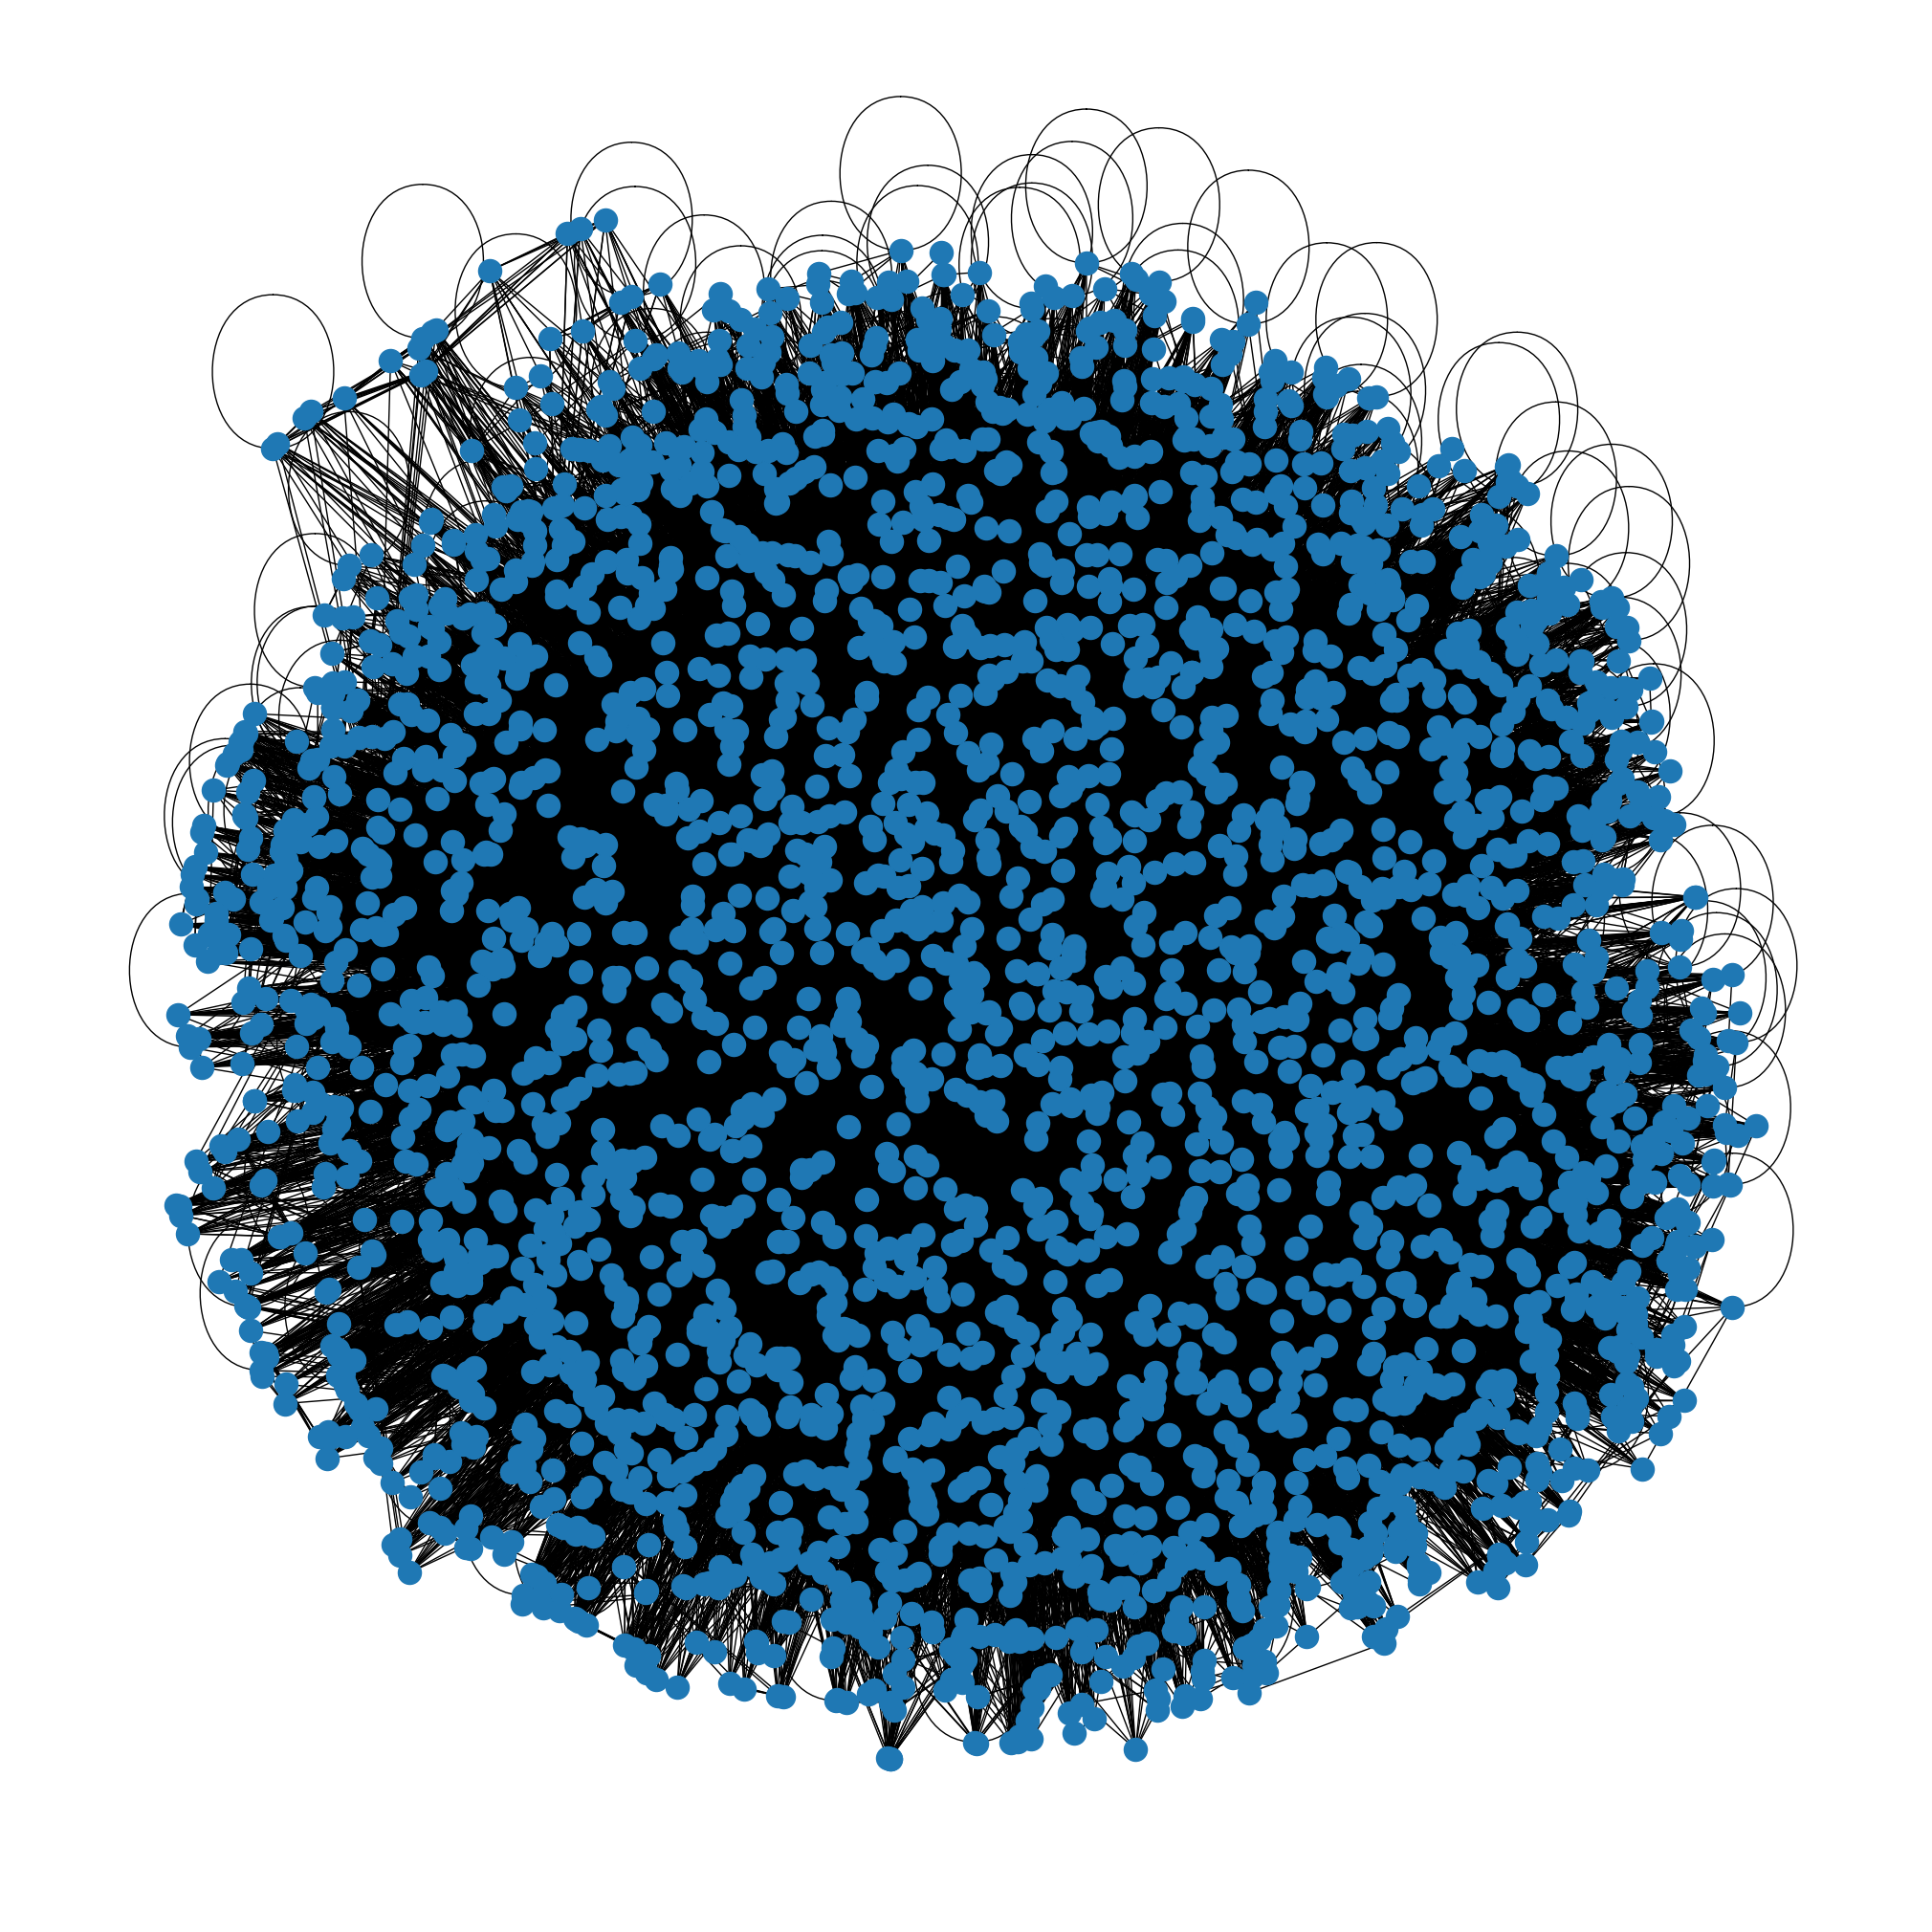

In [6]:
# visualize the graph
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
nx.draw(G, with_labels=False)
plt.show()


In [8]:
# get node embeddings
from node2vec import Node2Vec

node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# show embeddings for node from "RECEIPT_NUMBER_IDX"


Computing transition probabilities:   0%|          | 0/2995 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [03:01<00:00,  3.63s/it]


KeyError: "Key '1782131' not present"

In [15]:
model.wv[123]


array([ 0.4623682 ,  0.00635011, -0.09634876,  0.24706136, -0.15595318,
       -0.3990864 ,  0.35403723,  0.28150868, -0.19441402, -0.2247514 ,
        0.15698639,  0.10597354, -0.11398591, -0.5745202 ,  0.15334924,
        0.12644544,  0.4015349 ,  0.21190178, -0.11024859,  0.12992541,
       -0.5934155 ,  0.42710283,  0.0890763 , -0.03620453,  0.6433011 ,
       -0.48671192,  0.13763726,  0.08063961, -0.43379274, -0.03031148,
       -0.09702803, -0.03151057, -0.15146023, -0.5419812 , -0.1863533 ,
        0.22407168, -0.3951958 , -0.3902616 , -0.06277825, -0.56292087,
        0.06975859,  0.07986335, -0.5166912 ,  0.11507623,  0.03325687,
        0.01163972,  0.45635048, -0.54146737,  0.06367716, -0.2299408 ,
        0.2528334 ,  0.29437473,  0.02729516, -0.07598358,  0.08076249,
       -0.07030872,  0.26746145, -0.4794279 , -0.09415919, -0.02460573,
        0.08338626,  0.15394098,  0.17682701, -0.00137698], dtype=float32)

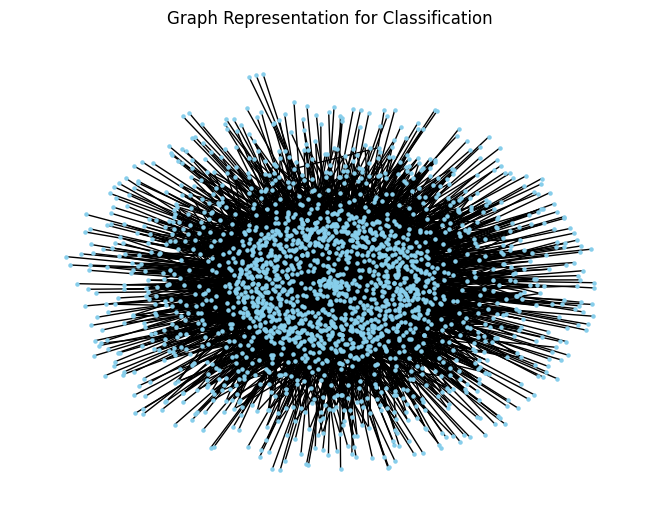

In [75]:
# Visualize the graph (optional)
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=5, node_color='skyblue', font_weight='bold', font_size=9)
plt.title('Graph Representation for Classification')
plt.show()


In [76]:
import torch
from torch_geometric.data import Data

# Convert NetworkX G to PyTorch Geometric data
edge_index = torch.tensor(list(G.edges)).t().contiguous()
x = torch.tensor([list(G.nodes[node].values()) for node in G.nodes], dtype=torch.float)  # Node features

# Assuming you have node labels/targets as well
y = torch.tensor([G.nodes[node]['target'] for node in G.nodes], dtype=torch.long)  # Replace with your actual node labels

data = Data(x=x, edge_index=edge_index, y=y)


ValueError: expected sequence of length 39 at dim 1 (got 0)

In [71]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize the model
model = GCN(input_dim=x.shape[1], hidden_dim=16, output_dim=1)


In [72]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

def train(data):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()

num_epochs = 20
# Train the model
for epoch in range(num_epochs):
    train(data)


IndexError: index 0 is out of bounds for dimension 0 with size 0

In [69]:
# Evaluate the model
model.eval()
_, pred = model(data).max(dim=1)
correct = float (pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
acc = correct / data.test_mask.sum().item()
print('Accuracy: {:.4f}'.format(acc))

# confusion matrix
from sklearn.metrics import confusion_matrix
y_true = data.y[data.test_mask].numpy()
y_pred = pred[data.test_mask].numpy()
confusion_matrix(y_true, y_pred)


IndexError: index 0 is out of bounds for dimension 0 with size 0